# Data Wrangling for Santa Clara Master Gardener Club by Michelle Petersen

In [82]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import json
import difflib
import geopandas as gpd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

## Gather

In [6]:
df = gpd.read_file('ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp')
print(myShapefile)

     State          County            City                         Name  \
0       CA       Riverside         Menifee                     Sun City   
1       CA     Santa Clara        San Jose                       Alviso   
2       CA           Marin      San Rafael                Santa Venetia   
3       CA           Marin      San Rafael                    Marinwood   
4       CA     Los Angeles   Santa Clarita                      Newhall   
5       CA     Los Angeles     Los Angeles                      Tujunga   
6       CA         Ventura          Oxnard                     Cabrillo   
7       CA     Los Angeles     Los Angeles                 Shadow Hills   
8       CA     Los Angeles     Los Angeles                       Sylmar   
9       CA   San Francisco   San Francisco                     Presidio   
10      CA     Los Angeles   Santa Clarita               Canyon Country   
11      CA         Alameda         Alameda                     East End   
12      CA       San Mate

In [24]:
df.to_csv('California neighborhoods.csv')

In [ ]:
cities = ['San Jose', 'Santa Clara', 'Sunnyvale', 'Palo Alto', 'Mountain View', 'Cupertino',
         'Milpitas', 'Los Gatos', 'Gilroy', 'Morgan Hill', 'Campbell', 'Los Altos',
         'Saratoga', 'Stanford', 'Los Altos Hills', 'Cambrian Park', 
          'Monte Sereno', 'San Martin', 'East Foothills', 'Alum Rock',
          'Fruitdale', 'Lexington Hills', 'Loyola']

In [223]:
sc_df = df[df['County'] == 'Santa Clara']
print(sc_df)

     State       County           City                      Name RegionID  \
1       CA  Santa Clara       San Jose                    Alviso     8075   
22      CA  Santa Clara       San Jose             Cambrian Park   114074   
42      CA  Santa Clara      Cupertino          Rancho Rinconada   117559   
43      CA  Santa Clara       Campbell                 San Tomas   117891   
68      CA  Santa Clara       San Jose                 Berryessa   113736   
74      CA  Santa Clara       San Jose                 Evergreen   115003   
94      CA  Santa Clara  Mountain View            Blossom Valley     3707   
129     CA  Santa Clara      Los Altos                    Loyola   116334   
207     CA  Santa Clara       Campbell                      Dell   178814   
213     CA  Santa Clara       San Jose               Willow Glen   118987   
241     CA  Santa Clara      Cupertino                Oak Valley   189743   
242     CA  Santa Clara      Sunnyvale                 Ponderosa   191799   

In [224]:
sc_df.to_csv('Santa Clara neighborhoods.csv')

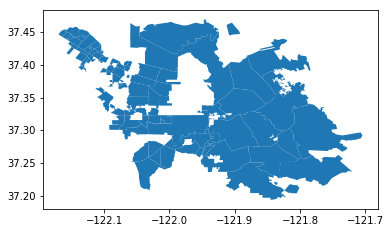

In [225]:
sc_df.plot()

## Assess

In [226]:
#from googleapiclient.discovery import build
#from httplib2 import Http
import gspread
from google.oauth2 import service_account
from google.auth.transport.requests import AuthorizedSession

# The scope to read the spreadsheet
_GS_SCOPE = ['https://www.googleapis.com/auth/spreadsheets.readonly',
            'https://www.googleapis.com/auth/drive']

# The ID and range of the MasterGardener spreadsheet.
_GS_ID = '1pPOuRZ9YsKwXGKgxzSm9tXCR_dgkCY4WNh3rg_cFX08'

service_account_info = json.load(open('Master Gardener-7e906e507d9d.json'))
credentials = service_account.Credentials.from_service_account_info(
    service_account_info,
    scopes=_GS_SCOPE)

if credentials:
    gc = gspread.Client(auth=credentials)
    gc.session = AuthorizedSession(credentials)
    book = gc.open_by_key(_GS_ID)
    print(book.title)
    worksheet_list = book.worksheets()
    for worksheet in worksheet_list:
        print(worksheet)

Santa Clara County Master Gardeners
<Worksheet 'Contacts' id:0>
<Worksheet 'Neighborhoods' id:1790253258>
<Worksheet 'Contact-Neighborhood Mapping' id:1541812186>
<Worksheet 'Contact-Neighborhood Mapping - old' id:1957701709>


In [198]:
df_contacts = pd.DataFrame(sheet.get_worksheet(0).get_all_values())
df_neighborhoods = pd.DataFrame(sheet.get_worksheet(1).get_all_values())
df_contact_neighborhood = pd.DataFrame(sheet.get_worksheet(2).get_all_values())

In [199]:
df_contacts.head()

,0,1,2,3
0,Name,e-mail,Assigned Neighborhood,Resides in Neighborhood
1,Anita Rosen,anita@readygo.com,Gemello,TRUE
2,Ann Ranish,annranish@gmail.com,Starbird,TRUE
3,Carol Peck,CAnative.carol@gmail.com,Northern Gilroy,TRUE
4,Don Krafft,dfk@donkrafft.com,Morse Park - Sunnyvale,TRUE


In [200]:
df_contacts.reset_index()
df_contacts.columns = ['Name', 'email', 'Assigned Neighborhood', 'Resides in Neighborhood']

In [201]:
df_contacts = df_contacts[df_contacts['Name'] != 'Name']

In [202]:
df_contacts['Assigned Neighborhood'] = df_contacts['Assigned Neighborhood'].str.title()

In [203]:
df_contacts.head()

,Name,email,Assigned Neighborhood,Resides in Neighborhood
1,Anita Rosen,anita@readygo.com,Gemello,TRUE
2,Ann Ranish,annranish@gmail.com,Starbird,TRUE
3,Carol Peck,CAnative.carol@gmail.com,Northern Gilroy,TRUE
4,Don Krafft,dfk@donkrafft.com,Morse Park - Sunnyvale,TRUE
5,Jeff Jenks,jenks.jeff@gmail.com,Monta Vista,TRUE


In [204]:
df_contact_neighborhood.head()

,0,1
0,Name,Neighborhood
1,Allie Judy,San Tomas
2,Allie Judy,newport Apartments
3,Allie Judy,hacienda
4,Allie Judy,pollard Road


In [205]:
df_contact_neighborhood.reset_index()
df_contact_neighborhood.columns = ['Name', 'Neighborhood']

In [206]:
df_contact_neighborhood = df_contact_neighborhood[df_contact_neighborhood['Name'] != 'Name']

In [207]:
df_contact_neighborhood.head()

,Name,Neighborhood
1,Allie Judy,San Tomas
2,Allie Judy,newport Apartments
3,Allie Judy,hacienda
4,Allie Judy,pollard Road
5,Allie Judy,los gatos woods


In [208]:
df_contact_neighborhood['Neighborhood'] = df_contact_neighborhood['Neighborhood'].str.title()

In [209]:
df_contact_neighborhood.head()

,Name,Neighborhood
1,Allie Judy,San Tomas
2,Allie Judy,Newport Apartments
3,Allie Judy,Hacienda
4,Allie Judy,Pollard Road
5,Allie Judy,Los Gatos Woods


In [210]:
df_neighborhoods.head()

,0,1,2,3,4,5
0,State,County,City,Name,RegionID,geometry
1,CA,Santa Clara,San Jose,Alviso,8075,POLYGON ((-121.9423569999999 37.46496300000007...
2,CA,Santa Clara,San Jose,Cambrian Park,114074,"POLYGON ((-121.878978755 37.27530488000008, -1..."
3,CA,Santa Clara,Cupertino,Rancho Rinconada,117559,"POLYGON ((-122.00649 37.32295, -122.004603875 ..."
4,CA,Santa Clara,Campbell,San Tomas,117891,POLYGON ((-121.9526834979999 37.27366922400006...


In [211]:
df_neighborhoods.reset_index()
df_neighborhoods.columns = ['State', 'County', 'City', 'Name', 'RegionID', 'geometry']

In [212]:
df_neighborhoods = df_neighborhoods[df_neighborhoods['Name'] != 'Name']

In [213]:
df_neighborhoods.head()

,State,County,City,Name,RegionID,geometry
1,CA,Santa Clara,San Jose,Alviso,8075,POLYGON ((-121.9423569999999 37.46496300000007...
2,CA,Santa Clara,San Jose,Cambrian Park,114074,"POLYGON ((-121.878978755 37.27530488000008, -1..."
3,CA,Santa Clara,Cupertino,Rancho Rinconada,117559,"POLYGON ((-122.00649 37.32295, -122.004603875 ..."
4,CA,Santa Clara,Campbell,San Tomas,117891,POLYGON ((-121.9526834979999 37.27366922400006...
5,CA,Santa Clara,San Jose,Berryessa,113736,POLYGON ((-121.8202519999999 37.43812700000007...


In [214]:
df_contact_neighborhood['Similar Neighborhood'] = 'None'
df_contacts['Similar Neighborhood'] = 'None'

In [215]:
neighborhoods = list(df_neighborhoods['Name'])
for index, row in df_contact_neighborhood.iterrows():
    row['Similar Neighborhood'] = difflib.get_close_matches(row['Neighborhood'].lower(), neighborhoods)

In [216]:
df_contact_neighborhood.head()

,Name,Neighborhood,Similar Neighborhood
1,Allie Judy,San Tomas,[San Tomas]
2,Allie Judy,Newport Apartments,[]
3,Allie Judy,Hacienda,[]
4,Allie Judy,Pollard Road,[]
5,Allie Judy,Los Gatos Woods,[]


In [217]:
for index, row in df_contacts.iterrows():
    row['Similar Neighborhood'] = difflib.get_close_matches(row['Assigned Neighborhood'].lower(), neighborhoods)

In [218]:
df_contacts.head()

,Name,email,Assigned Neighborhood,Resides in Neighborhood,Similar Neighborhood
1,Anita Rosen,anita@readygo.com,Gemello,TRUE,[Gemello Park]
2,Ann Ranish,annranish@gmail.com,Starbird,TRUE,[]
3,Carol Peck,CAnative.carol@gmail.com,Northern Gilroy,TRUE,[]
4,Don Krafft,dfk@donkrafft.com,Morse Park - Sunnyvale,TRUE,[]
5,Jeff Jenks,jenks.jeff@gmail.com,Monta Vista,TRUE,"[Monta Vista South, Monta Vista North]"


In [219]:
df_contacts.to_csv('ms_contacts_master.csv', index=False)
df_contact_neighborhood.to_csv('ms_contact_neighborhood_master.csv', index=False)

### Quality

##### Data Quality Dimensions
Completeness: Do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing? 

Validity: We have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables). 

Accuracy: Inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty. 

Consistency: Inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired. 

##### `df_tweets` Table Actions 
- Blah Blah
##### `df_tweet_additional_info` Table Actions
- Remove retweets.
- 

### Tidiness
##### Tidiness Criteria:
- Each variable you measure should be in one column.
- Each different observation of that variable should be in a different row.
- There should be one table for each “kind” of variable.
- Related tables should each include a column that allows them to be linked.
##### Tidiness Actions
- 

## Clean

##### Define
Remove tweets from the df_tweets and df_tweet_additional_info tables that do not have images in the df_image_predict table.

##### Code

##### Test

## Storing

Store the clean DataFrame in a CSV file named SantaClaraMasterGardener_master.csv.

## Analysis and Visualization

### Viz 1: